# Load datasets

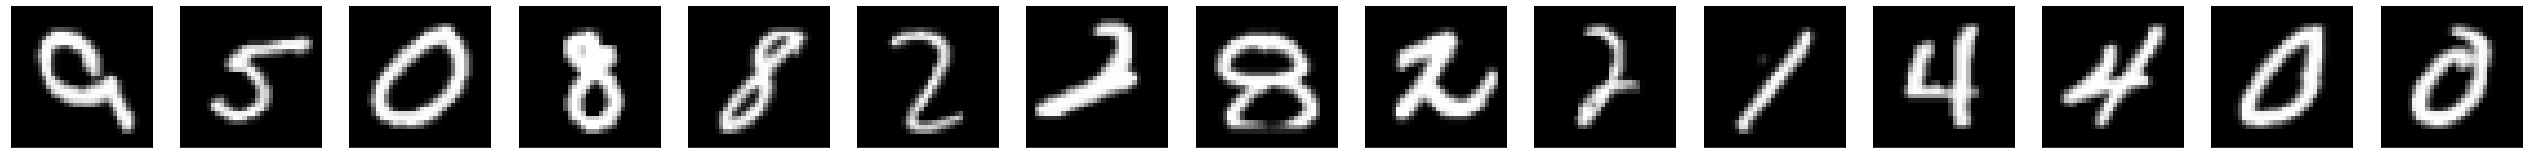

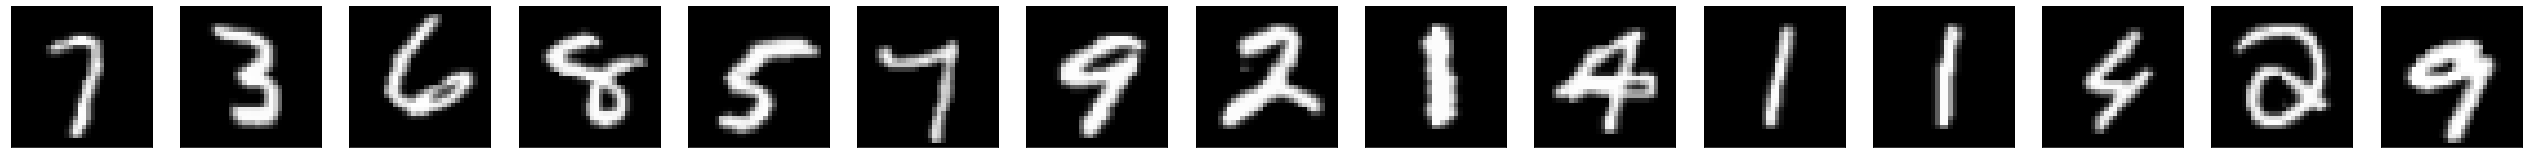

In [2]:
import tensorflow as tf
import numpy as np
import tqdm
import matplotlib.pyplot as plt

import FSHA
import architectures
import datasets
from datasets import *

# select class to remove from the attacker's training set
class_to_remove = 0
xpriv, xpub, xremoved_examples, _ = load_mnist_mangled(class_to_remove)

n = 15

x_priv = datasets.getImagesDS(xpriv, n)
x_pub = datasets.getImagesDS(xpub, n)

datasets.plot(x_priv)
datasets.plot(x_pub)

# Setup attack:

In [3]:
batch_size = 64
id_setup = 4
hparams = {
    'WGAN' : True,
    'gradient_penalty' : 500.,
    'style_loss' : None,
    'lr_f' :  0.00001,
    'lr_tilde' : 0.00001,
    'lr_D' : 0.0001,
}

fsha = FSHA.FSHA(xpriv, xpub, id_setup-1, batch_size, hparams)

# Run attack:

In [4]:
log_frequency = 500
LOG = fsha(10000, verbose=True, progress_bar=False, log_frequency=log_frequency)

RUNNING...
Use WGAN loss
Use GP
Use WGAN loss
Use GP
log--00%-0000000] validation: 0.8558
log--05%-0000500] validation: 0.5253
log--10%-0001000] validation: 0.1838
log--15%-0001500] validation: 0.1618
log--20%-0002000] validation: 0.1294
log--25%-0002500] validation: 0.0925
log--30%-0003000] validation: 0.0752
log--35%-0003500] validation: 0.0592
log--40%-0004000] validation: 0.0489
log--45%-0004500] validation: 0.0438
log--50%-0005000] validation: 0.0416
log--55%-0005500] validation: 0.0387
log--60%-0006000] validation: 0.0365
log--65%-0006500] validation: 0.0333
log--70%-0007000] validation: 0.0311
log--75%-0007500] validation: 0.0301
log--80%-0008000] validation: 0.0286
log--85%-0008500] validation: 0.0267
log--90%-0009000] validation: 0.0263
log--95%-0009500] validation: 0.0256


# Plot logs:

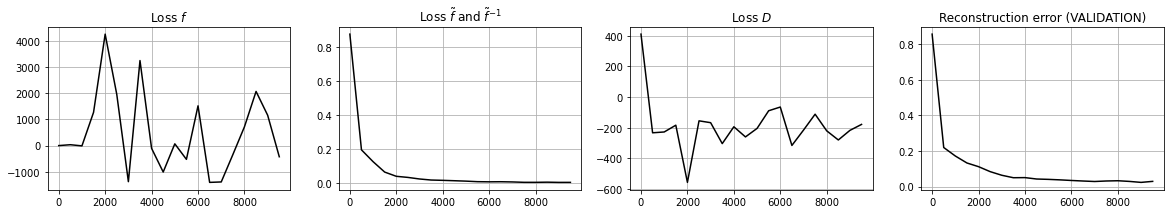

In [5]:
def plot_log(ax, x, y, label):
    ax.plot(x, y, color='black')
    ax.set(title=label)
    ax.grid()

n = 4
fix, ax = plt.subplots(1, n, figsize=(n*5, 3))
x = np.arange(0, len(LOG)) * log_frequency 

plot_log(ax[0], x, LOG[:, 0], label='Loss $f$')
plot_log(ax[1], x, LOG[:, 1],  label='Loss $\\tilde{f}$ and $\\tilde{f}^{-1}$')
plot_log(ax[2], x, LOG[:, 2],  label='Loss $D$')
plot_log(ax[3], x, LOG[:, 3],  label='Reconstruction error (VALIDATION)')

# Plot reconstruction of the unknown, private data instances of the removed class:

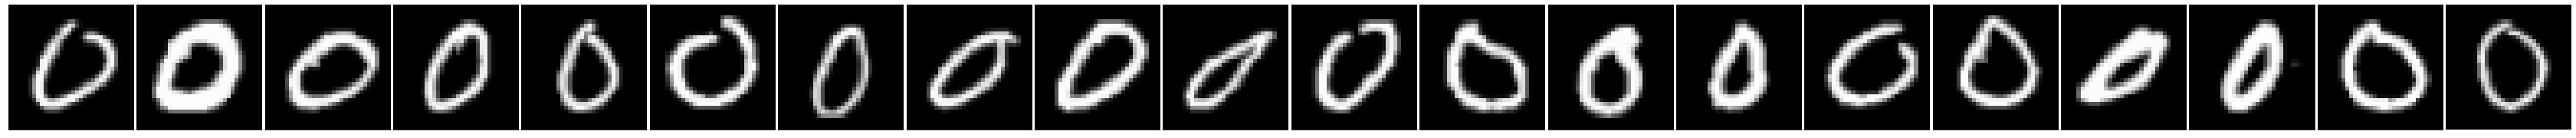

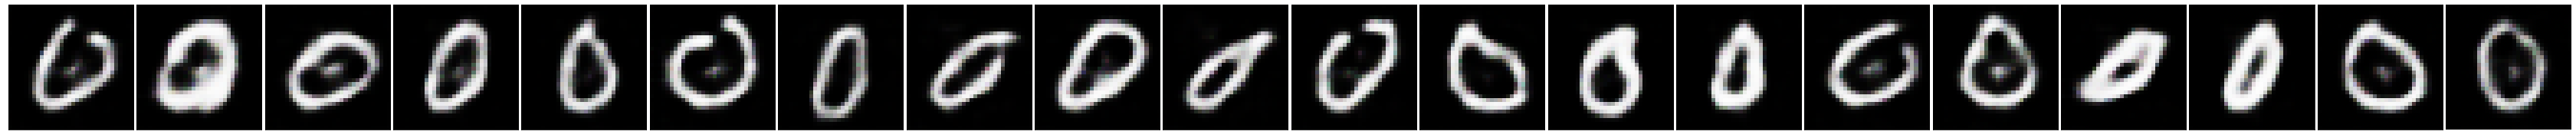

In [6]:
n = 20
X = getImagesDS(xremoved_examples, n)
X_recovered, control = fsha.attack(X)

def plot(X):
    n = len(X)
    X = (X+1)/2
    fig, ax = plt.subplots(1, n, figsize=(n*3,3))
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=-.05)
    for i in range(n):
        ax[i].imshow((X[i]), cmap='inferno');  
        ax[i].set(xticks=[], yticks=[])
        ax[i].set_aspect('equal')
        
    return fig

fig = plot(X)
fig = plot(X_recovered)